Este es un script donde entreno una red concatenada con todos los descriptores pertinentes generados por la libreria DScribe

Importamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error
import statistics 

Importamos los Datos

In [2]:
coulomb__loaded = np.load('coulomb_matrix.npz')
coulomb_matrix = coulomb__loaded['a']
mbtr__loaded = np.load('mbtr_matrix.npz')
mbtr_matrix = mbtr__loaded['b']
#soap__loaded = np.load('saop_matrix.npz')
#soap_matrix = soap__loaded['c']
acsf__loaded = np.load('acsf_matrix.npz')
acsf_matrix = acsf__loaded['d']
df = pd.read_csv("DScribe_mp_cid_smiles.csv") 
melting_point = df['melting_point']
dt = pd.read_csv("melting_point_info.csv") 

(0.0, 140.0)

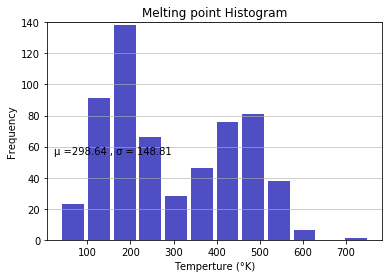

In [3]:
import matplotlib.pyplot as plt
import statistics as stats

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(melting_point, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperture (°K)')
plt.ylabel('Frequency')
plt.title('Melting point Histogram')

mu = stats.mean(melting_point)
sigma = stats.pstdev(melting_point)
mu = str(round(mu, 2))
sigma = str(round(sigma, 2))


plt.text(23, 55, '\u03BC ='+ mu +' , ' +'\u03C3 = ' + sigma)
maxfreq = n.max()


plt.savefig('histograma.png', dpi=500)
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [16]:
mp_filtered = []
indices = []

for i in range(len(melting_point)):
    number = melting_point[i]
    if number >= 60 and number <= 300:
        indices.append(i)
        mp_filtered.append(number)

In [7]:
len(indices)

356

(0.0, 60.0)

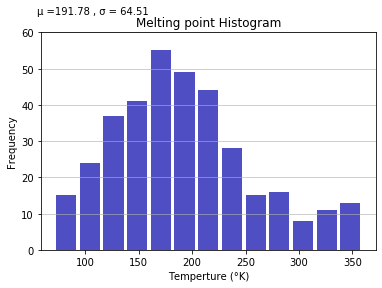

In [8]:
import matplotlib.pyplot as plt
import statistics as stats

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(mp_filtered, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperture (°K)')
plt.ylabel('Frequency')
plt.title('Melting point Histogram')

mu = stats.mean(mp_filtered)
sigma = stats.pstdev(mp_filtered)
mu = str(round(mu, 2))
sigma = str(round(sigma, 2))

plt.text(55, 65, '\u03BC ='+ mu +' , ' +'\u03C3 = ' + sigma)
maxfreq = n.max()

plt.savefig('histograma.png', dpi=500)
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [26]:
coulomb_matrix_bounded = []
for j in indices:
    coulomb_matrix_bounded.append(coulomb_matrix[j])
mbtr_matrix_bounded = []
for j in indices:
    mbtr_matrix_bounded.append(mbtr_matrix[j])
acsf_matrix_bounded = []
for j in indices:
    acsf_matrix_bounded.append(acsf_matrix[j])

cid_target = list(df['cid']) #Dscribe cids
cid_target_bounded = []
for j in indices:
    cid_target_bounded.append(cid_target[j])

In [27]:
dg = pd.read_csv("smarts_mordred_rdkit_databaselasso_merged_shap.csv") 

In [28]:
cid_target =  cid_target_bounded #Dscribe cids
cids = list(dt['cid'])#Descriptors cids
indices_bounded = []
for i, a in enumerate(cids):
    for j, b in enumerate(cid_target):
        if a == b:
            indices_bounded.append(i)

In [30]:
dj = dg.iloc[indices_bounded]
dj = dj.drop(labels=['Unnamed: 0'], axis=1)

In [31]:
dj

,AETA_eta_BR,Ortho,AATS2pe,fr_ketone,GATS2c,GATS3c,fr_benzodiazepine,VSA_EState6_x,VSA_EState7_y,nAHRing,...,NaaO,SdsN,fr_oxime,NdssC,VSA_EState5_y,Spiro-ring center,ATS8dv,ETA_dEpsilon_B,S double-bonded to Carbon,n6HRing
9,0.000000,0.466667,0.020346,0.0,0.410581,0.255525,0.0,0.085377,0.455980,0.0,...,0.0,0.000000,0.0,0.000,0.554874,0.0,0.026374,0.000000,0.692308,0.0
14,0.086727,0.666667,0.002605,0.0,0.200481,0.200796,0.0,0.085377,0.805702,0.0,...,0.0,0.000000,0.0,0.125,0.516154,0.0,0.059341,0.125853,1.000000,0.0
39,0.364406,0.500000,0.001148,0.0,0.286388,0.190877,0.0,0.085377,0.673375,0.0,...,0.0,0.000000,0.0,0.500,0.554874,0.0,0.073993,0.181526,0.000000,0.0
41,0.299107,0.200000,0.108994,0.0,0.278894,0.197881,0.0,0.085377,0.396598,0.0,...,0.0,0.000000,0.0,0.000,0.552698,0.0,0.000000,0.297616,0.000000,0.2
42,0.213090,0.233333,0.032514,0.0,0.148438,0.175687,0.0,0.085377,0.458488,0.2,...,0.0,0.000000,0.0,0.125,0.589794,0.0,0.021490,0.000000,0.076923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0.311743,0.166667,0.049053,0.0,0.302718,0.254018,0.0,0.313283,0.359479,0.0,...,0.0,0.000000,0.0,0.000,0.554874,0.0,0.000000,0.285786,0.000000,0.0
818,0.271031,0.166667,0.049285,0.0,0.558291,0.218671,0.0,0.294313,0.429840,0.0,...,0.0,0.000000,0.0,0.000,0.554874,0.0,0.004396,0.276689,0.000000,0.0
819,0.366656,0.300000,0.131128,0.0,0.416576,0.348700,1.0,0.446480,0.333781,0.2,...,0.0,0.271862,0.0,0.375,0.529889,0.0,0.157102,0.437618,0.000000,0.0
821,0.383282,0.133333,0.011370,0.0,0.242522,0.319935,0.0,0.085377,0.658623,0.0,...,0.0,0.000000,0.0,0.125,0.759367,0.0,0.040293,0.038746,0.000000,0.0


Generamos los conjuntos de entrenamiento y prueba para cada descriptor

In [37]:
#-------Descriptors-------
X_train_dj, X_test_dj, y_train_dj, y_test_dj = train_test_split( dj, mp_filtered, test_size=0.2, random_state=95)
#--------Coulomb----------
#Data split
coulomb_X_train, coulomb_X_test, coulomb_y_train, coulomb_y_test = train_test_split(coulomb_matrix_bounded, mp_filtered, test_size=0.2, random_state=42)
#---------MBTR------------
#Reshape
molecule_matrix_mbtr = np.zeros((356,61500))
for i, molecule in enumerate(mbtr_matrix_bounded):
    for t, atom in enumerate(molecule):
        for j, element in enumerate(atom):
            molecule_matrix_mbtr[i][j] = mbtr_matrix_bounded[i][t][j]    
#Data split
mbtr_X_train, mbtr_X_test, mbtr_y_train, mbtr_y_test = train_test_split(molecule_matrix_mbtr, mp_filtered, test_size=0.2, random_state=45)
#----------ACSF----------
#Data split
acsf_X_train, acsf_X_test, acsf_y_train, acsf_y_test = train_test_split(acsf_matrix_bounded, mp_filtered, test_size=0.2, random_state=56)
#---------SOAP---------
#Reshape
#molecule_matrix_soap = np.zeros((304,30250))
#for i, molecule in enumerate(soap_matrix):
#    for t, atom in enumerate(molecule):
#        for j, element in enumerate(atom):
#            molecule_matrix_soap[i][j] = soap_matrix[i][t][j]    
#Data split
#soap_X_train, soap_X_test, soap_y_train, soap_y_test = train_test_split(molecule_matrix_soap, melting_point, test_size=0.2, random_state=33)

In [38]:
#check image shape
#print('---Descriptors---')
#print(len(X_train_dj),  X_train_dj[0].shape)
#print(len(X_train_dj), X_train_dj[0].shape)
print('---Coulomb---')
print(len(coulomb_X_train),  coulomb_X_train[0].shape)
print(len(coulomb_X_test), coulomb_X_test[0].shape)
print('---MBTR---')
print(len(mbtr_X_train),  mbtr_X_train[0].shape)
print(len(mbtr_X_test), mbtr_X_test[0].shape)
print('---ACSF---')
print(len(acsf_X_train),  acsf_X_train[0].shape)
print(len(acsf_X_test), acsf_X_test[0].shape)
#print('---SOAP---')
#print(len(soap_X_train),  soap_X_train[0].shape)
#print(len(soap_X_test), soap_X_test[0].shape)

---Coulomb---
284 (55, 55)
72 (55, 55)
---MBTR---
284 (61500,)
72 (61500,)
---ACSF---
284 (55, 260)
72 (55, 260)


Importamos los modulos necesarios para la red

In [39]:
from keras import regularizers
from keras import Input, layers
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Concatenate
from keras import Input, layers

Using TensorFlow backend.


In [40]:
coulomb_input = Input(shape=(55,55))
coulomb_layers = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(coulomb_input)
coulomb_layers = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(coulomb_layers)
coulomb_layers = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(coulomb_layers)
coulomb_layers = layers.Dropout(0.5)(coulomb_layers)
coulomb_layers = layers.MaxPooling1D(pool_size=2)(coulomb_layers)
coulomb_layers = layers.Flatten()(coulomb_layers)
coulomb_layers = layers.Dense(100, activation='relu')(coulomb_layers)
coulomb_layers = layers.Dense(100, activation='relu')(coulomb_layers)
coulomb_layers = layers.Dense(100, activation='relu')(coulomb_layers)

In [41]:
mbtr_input = Input(shape=(61500,))
mbtr_layers = layers.Dense(64, activation='relu')(mbtr_input)
mbtr_layers= layers.Dense(64, activation='relu')(mbtr_layers)
mbtr_layers= layers.Dense(64, activation='relu')(mbtr_layers)
mbtr_layers= layers.Dense(64, activation='relu')(mbtr_layers)
mbtr_layers= layers.Dense(64, activation='relu')(mbtr_layers)
mbtr_layers = layers.Dropout(0.3)(mbtr_layers)
mbtr_layers = layers.Dense(128,activation='relu')(mbtr_layers)
mbtr_layers = layers.Dense(128,activation='relu')(mbtr_layers)
mbtr_layers = layers.Dense(128,activation='relu')(mbtr_layers)

In [42]:
acsf_input = Input(shape=(55,260))
acsf_layers = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(acsf_input)
acsf_layers = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(acsf_layers)
acsf_layers = layers.Dropout(0.5)(acsf_layers)
acsf_layers = layers.MaxPooling1D(pool_size=2)(acsf_layers)
acsf_layers = layers.Flatten()(acsf_layers)
acsf_layers = layers.Dense(100, activation='relu')(acsf_layers)
acsf_layers = layers.Dense(100, activation='relu')(acsf_layers)
acsf_layers = layers.Dense(100, activation='relu')(acsf_layers)

In [43]:
dt_input = Input(shape=(665,))
dt_layers = layers.Dense(64, activation='relu')(dt_input)
dt_layers = layers.Dense(64, activation='relu')(dt_layers)
dt_layers = layers.Dense(64, activation='relu')(dt_layers)
dt_layers = layers.Dense(64, activation='relu')(dt_layers)
dt_layers = layers.Dropout(0.3)(dt_layers)
dt_layers = layers.Dense(128,activation='relu')(dt_layers)
dt_layers = layers.Dense(128,activation='relu')(dt_layers)
dt_layers = layers.Dense(128,activation='relu')(dt_layers)

In [44]:
concatenated = layers.concatenate([ mbtr_layers, dt_layers],axis = -1)
concatenated = layers.Dense(2000, activation='relu')(concatenated)
concatenated = layers.Dense(1000, activation='relu')(concatenated)
concatenated = layers.Dense(600, activation='relu')(concatenated)
concatenated = layers.Dense(500, activation='relu')(concatenated)
concatenated = layers.Dense(400, activation='relu')(concatenated)
concatenated = layers.Dropout(0.001)(concatenated)
concatenated = layers.Dense(300, activation='relu')(concatenated)
concatenated = layers.Dense(250, activation='relu')(concatenated)
output = layers.Dense(1, activation='linear')(concatenated)

In [45]:
from keras.models import Model

model = Model([coulomb_input, mbtr_input, acsf_input, dt_input],output)

model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mae']) 

In [46]:
#history = model.fit(X_train, y_train, validation_data = (X_test, y_test),  epochs=500, batch_size=100)
history = model.fit([coulomb_X_train, mbtr_X_train, acsf_X_train, X_train_dj], coulomb_y_train, validation_data=([ coulomb_X_test, mbtr_X_test, acsf_X_test, X_test_dj ], coulomb_y_test), batch_size=64, epochs=150)

Train on 284 samples, validate on 72 samples
Epoch 1/150
284/284 [==============================] - 5s 19ms/step - loss: 190.7897 - mae: 190.7897 - val_loss: 186.5098 - val_mae: 186.5098
Epoch 2/150
284/284 [==============================] - 2s 6ms/step - loss: 148.8179 - mae: 148.8179 - val_loss: 101.3245 - val_mae: 101.3245
Epoch 3/150
284/284 [==============================] - 1s 5ms/step - loss: 103.0044 - mae: 103.0044 - val_loss: 149.5433 - val_mae: 149.5433
Epoch 4/150
284/284 [==============================] - 1s 5ms/step - loss: 139.0076 - mae: 139.0076 - val_loss: 111.9085 - val_mae: 111.9085
Epoch 5/150
284/284 [==============================] - 1s 5ms/step - loss: 76.5794 - mae: 76.5794 - val_loss: 64.4767 - val_mae: 64.4767
Epoch 6/150
284/284 [==============================] - 1s 4ms/step - loss: 79.1901 - mae: 79.1901 - val_loss: 100.0400 - val_mae: 100.0400
Epoch 7/150
284/284 [==============================] - 1s 4ms/step - loss: 68.6461 - mae: 68.6461 - val_loss: 69.2

Epoch 60/150
284/284 [==============================] - 1s 4ms/step - loss: 33.3831 - mae: 33.3831 - val_loss: 66.9494 - val_mae: 66.9494
Epoch 61/150
284/284 [==============================] - 1s 5ms/step - loss: 30.7178 - mae: 30.7178 - val_loss: 65.4246 - val_mae: 65.4246
Epoch 62/150
284/284 [==============================] - 1s 5ms/step - loss: 32.2977 - mae: 32.2977 - val_loss: 65.2963 - val_mae: 65.2963
Epoch 63/150
284/284 [==============================] - 1s 4ms/step - loss: 30.8994 - mae: 30.8994 - val_loss: 68.4910 - val_mae: 68.4910
Epoch 64/150
284/284 [==============================] - 1s 5ms/step - loss: 30.7497 - mae: 30.7497 - val_loss: 65.5867 - val_mae: 65.5867
Epoch 65/150
284/284 [==============================] - 1s 4ms/step - loss: 30.7829 - mae: 30.7829 - val_loss: 62.5623 - val_mae: 62.5623
Epoch 66/150
284/284 [==============================] - 1s 5ms/step - loss: 44.2033 - mae: 44.2033 - val_loss: 58.4147 - val_mae: 58.4147
Epoch 67/150
284/284 [============

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


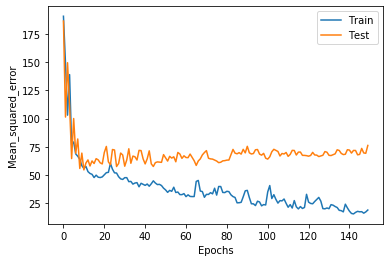

In [47]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Mean_squared_error')
plt.legend()
plt.savefig('op_learning_curve_smartsandrdkit_acotado.png', dpi=500)
plt.legend()

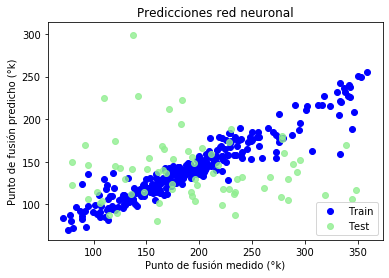

In [48]:
import matplotlib.pyplot as plt
plt.scatter(coulomb_y_train,model.predict([coulomb_X_train, mbtr_X_train, acsf_X_train, X_train_dj]), label = 'Train', c='blue')
plt.title('Predicciones red neuronal')
plt.xlabel('Punto de fusión medido (°k)')
plt.ylabel('Punto de fusión predicho (°k)')
plt.scatter(coulomb_y_test,model.predict([coulomb_X_test, mbtr_X_test, acsf_X_test, X_test_dj  ]),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.savefig('op_dot_smarts_rdkit.png_acotado.png', dpi=500)
plt.show()

In [50]:
predict = model.predict([ coulomb_X_train, mbtr_X_train, acsf_X_train, X_train_dj])
predictions = []
for i in range(len(predict)):
    predictions.append(predict[i][0])

In [51]:
for index, element in enumerate(coulomb_y_test):
    print("Original: ",element, "predicted: ", predictions[index])

Original:  152.5 predicted:  93.13425
Original:  109.5 predicted:  138.61954
Original:  167.0 predicted:  116.99698
Original:  230.5 predicted:  135.50218
Original:  115.0 predicted:  162.30559
Original:  166.0 predicted:  84.60376
Original:  236.0 predicted:  129.37483
Original:  202.5 predicted:  108.47305
Original:  348.65 predicted:  163.24507
Original:  233.5 predicted:  145.19905
Original:  222.5 predicted:  115.88878
Original:  293.0 predicted:  141.96248
Original:  319.15 predicted:  159.12016
Original:  228.5 predicted:  110.09238
Original:  130.0 predicted:  110.51935
Original:  277.0 predicted:  166.7217
Original:  228.5 predicted:  162.60143
Original:  232.5 predicted:  158.42067
Original:  174.75 predicted:  142.25233
Original:  278.5 predicted:  148.77495
Original:  284.0 predicted:  156.70567
Original:  234.0 predicted:  160.92015
Original:  135.0 predicted:  181.57942
Original:  94.75 predicted:  157.60847
Original:  280.0 predicted:  125.52331
Original:  182.5 predicte

In [55]:
len(coulomb_y_test)

72

In [56]:
len(predictions)

284

In [52]:
from scipy import stats
from sklearn.metrics import mean_absolute_error
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(coulomb_y_test, predictions)
error = mean_absolute_error(coulomb_y_test, predictions)
print ("r-squared:", r_value**2)
print("slop", slope)
print('mean_error', error)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 72 and the array at index 1 has size 284